In [1]:
import json 
import pprint
import numpy as np
import random
import pandas as pd
from torch import nn


#filenames
filename_info_file = "/scratch/lt2326-h21/a1/info.json"
filename_training_data = "/scratch/lt2326-h21/a1/train.jsonl"
filename_testing_data = "/scratch/lt2326-h21/a1/test_cls.jsonl"


with open(filename_info_file, "r") as f:
    info = json.load(f)              #contains keys = test_cls, test_det, train, val

#training data
training_data = [json.loads(line) for line in open(filename_training_data, 'r')]
 


In [2]:
info_filenames = []

for item in info["train"]:
    info_filenames.append(item["file_name"])


print(len(info_filenames))

24290


In [3]:
print(info["train"][79]["file_name"])

0000612.jpg


In [4]:
pprint.pprint(training_data[79]["image_id"])

'0000612'


In [5]:


#same filenames in info as in training_data, why would i need to actually use info?

for i in range(24290):
    a = training_data[i]["file_name"]
    b = info["train"][i]["file_name"]
    if a != b:
        print("{} and {} are not equal".format(a, b))

In [77]:
from pathlib import Path
import glob
import os

#returns list of the names of files in directory, removed suffix ".jpg" and file path
def get_filename(filepath):
    image_folder = Path("/scratch/lt2326-h21/a1/images") #contains 1000 images
    names_of_files = [os.path.basename(x).removesuffix(".jpg") for x in glob.glob("/scratch/lt2326-h21/a1/images/*.jpg")]
    
    return names_of_files




names_of_files = get_filename("/scratch/lt2326-h21/a1/images")
    
print(names_of_files[:5])

['0001261', '1002235', '0000614', '1000699', '0001264']


In [7]:

#training_data[every image][annotations][every box in image][adjuted_bbox, is chinese, polygon, chinese character]

#input training_data, outputs list of [ [ [polygon] [polygon] [polygon]...] [image_name] ]....

def datagetter(training_data):
    
    annotations_list = []
    
    for i in range(len(training_data)):                 

        #annotations in each image
        annotations = training_data[i]["annotations"]
        image_id = training_data[i]["image_id"]
        each_image = []
        
        ##only get information if the information about that image is in the image folder
        if image_id in names_of_files:

            #for each annotation in each image
            for anno in annotations:

                #if the character is chinese
                for a in anno:
                    if type(a) is dict:
                        if a["is_chinese"]:

                            #appends each polygon of an image and what image it belongs to
                            toappend = a["polygon"] 
                            each_image.append(toappend)

        #add each image annotations to list
            annotations_list.append([each_image, image_id])
        
        
    return annotations_list


annotations_list = datagetter(training_data)


[[[[20.95843278751906, 971.3361430202995], [31.84069596565396, 971.5145407773181], [31.840695965653964, 991.1313644165264], [20.95843278751906, 990.688995994651]], [[31.84069596565396, 971.5145407773181], [43.93209949691496, 971.7127605073388], [43.93209949691496, 991.6228848852769], [31.840695965653964, 991.1313644165264]], [[43.93209949691496, 971.7127605073388], [56.829596596926685, 971.9241948860274], [56.82959659692668, 992.1471733852774], [43.93209949691496, 991.6228848852769]], [[56.829596596926685, 971.9241948860274], [69.72709369693841, 972.1356292647162], [69.72709369693841, 992.6714618852778], [56.82959659692668, 992.1471733852774]], [[333.72273746280354, 677.3502128710487], [350.2476556221936, 684.3789110926897], [350.2476556221936, 713.5345188576267], [333.72273746280354, 707.3471065787684]], [[350.2476556221936, 684.3789110926897], [365.96648021283283, 691.0647459864458], [365.96648021283283, 719.4201061472725], [350.2476556221936, 713.5345188576267]], [[365.9664802128328

In [8]:
from PIL import Image
import torch


#send in train, test or validation, get [[information about image] actual image]
def image_getter(list_of_data):  #added torch.tensor(np.array( before image
    
    
    return [(list_of_data[x], 
             np.insert(np.array(Image.open("/scratch/lt2326-h21/a1/images/{}.jpg".format(list_of_data[x][1]))),3,0,axis=2))
            for x in range(len(list_of_data))]

data = image_getter(annotations_list)



In [3]:
from itertools import combinations
import matplotlib.path as mpltPath

#coordinate matrix
coordlist = [x for x in np.ndindex(2048, 2048)]


def in_poly_or_not(polygons, image_array):
     
    #each poly for polygons
    poly = [[tuple(x) for x in sublist] for sublist in polygons]
    
    for item in poly:
        
        #gets coordinate points inside polygon
        path = mpltPath.Path(item)
        
        #coord list is a list of all coordinates in a 2048 x 2048 matrix
        inside = path.contains_points(coordlist)
        
        #finds the nonzero values inside the grid
        a = np.nonzero(inside)
        
        #for each nonzero value
        for item2 in a:
            for j in item2:
                
                image_array[coordlist[j]][3] = 1
    
    
    return image_array



def datasaver(data):
    for image in data:
        polygons = image[0][0]
        image_name = image[0][1]
        image = image[1]
        
        #check so file doesnt exist already, if it does, do not run the function on it again
        if not os.path.exists("new_files_training/{}.npy".format(image_name)):
            if not os.path.exists("new_files_testing/{}.npy".format(image_name)):
            
                #if no image, check poly of function, save
                new_image = in_poly_or_not(polygons, image)
                np.save("new_files_training/{}".format(image_name), new_image)
                print("file saved is called {}.npy".format(image_name))
        
    return 0

getsomedata = datasaver(data)

    

            

#found the pixels corresponding to the polygon box
#add 1 to all coordinates where true, 0 otherwise
#can index into numpy array as usual

#somehow add 1 or 0 values to each pixel depending on T/F
#know which are true by coordinate
#just add false to all except the ones that are true, then add true to them




        


NameError: name 'data' is not defined

In [78]:
import numpy as np

def get_filename(filepath):
    image_folder = Path(filepath) 
    names_of_files = [os.path.basename(x).removesuffix(".npy") for x in glob.glob("{}/*.npy".format(filepath))]
    ("new_files_training/{}.".format(names_of_files))
    
    return names_of_files


def find_saved_data(name_of_file):
    new_image = np.load("new_files_training/{}.npy".format(name_of_file))
    print("{}".format(name_of_file))    
    return np.delete([[ x for x in sublist] for sublist in new_image],3,axis=2) #    this only takes pixel values
            


def find_saved_labels(name_of_file):
    new_image = np.load("new_files_training/{}.npy".format(name_of_file))
    print("{}".format(name_of_file))
    return [[ x[3] for x in sublist] for sublist in new_image]   #    this only takes the 1 or 0 value
    
    


names_of_files = get_filename("new_files_training/")


In [3]:
#import torch
#labels = [find_saved_labels(name) for name in names_of_files]
#labels2 = torch.Tensor(labels)
#torch.save(labels2, "600_labels" )
#print(labels2.shape)

1000904
1002588
0001919
1002510
0001893
0001217
1000586
1001511
1000872
0001913
0001557
1002137
1000414
0000574
1002026
0001495
0001901
0001370
1002414
1000937
0001870
1000195
1001510
1002273
1002264
0000181
1000228
1000606
1000866
0001233
1002406
0000643
0000870
0000448
0000902
0001847
0001212
1001406
1002541
1000621
1001801
1000926
0001263
0001840
1000828
0000859
1000880
1002190
0001977
0001244
1001857
0001365
1001755
0001765
0001860
1001903
1002193
1002279
0001401
1001839
0000566
0000639
0001898
0001783
0000900
1001542
0001514
0000941
1001392
1001241
0000684
1002277
0000931
1002194
0000621
1002678
1001578
1002083
0001524
1001759
0000942
1000905
1000611
1002088
1002649
0001241
0001583
0000406
0000483
1001225
1001909
1000618
0000482
1000695
0000884
0001927
0000871
1002229
1001836
1001210
1000181
1002416
1000620
1000683
0001766
1002413
0001377
0000822
0000930
1001248
0000185
1001548
1002227
1000637
0001864
0000172
1000190
1002239
1002202
0000634
0000878
0001525
0001856
0000447
0001967


In [79]:
#import torch
#data = [find_saved_data(name) for name in names_of_files]
#data2 = torch.Tensor(data)
#torch.save(data2, "600_data" )
#print(data2.shape)

1000904
1002588
0001919
1002510
0001893
0001217
1000586
1001511
1000872
0001913
0001557
1002137
1000414
0000574
1002026
0001495
0001901
0001370
1002414
1000937
0001870
1000195
1001510
1002273
1002264
0000181
1000228
1000606
1000866
0001233
1002406
0000643
0000870
0000448
0000902
0001847
0001212
1001406
1002541
1000621
1001801
1000926
0001263
0001840
1000828
0000859
1000880
1002190
0001977
0001244
1001857
0001365
1001755
0001765
0001860
1001903
1002193
1002279
0001401
1001839
0000566
0000639
0001898
0001783
0000900
1001542
0001514
0000941
1001392
1001241
0000684
1002277
0000931
1002194
0000621
1002678
1001578
1002083
0001524
1001759
0000942
1000905
1000611
1002088
1002649
0001241
0001583
0000406
0000483
1001225
1001909
1000618
0000482
1000695
0000884
0001927
0000871
1002229
1001836
1001210
1000181
1002416
1000620
1000683
0001766
1002413
0001377
0000822
0000930
1001248
0000185
1001548
1002227
1000637
0001864
0000172
1000190
1002239
1002202
0000634
0000878
0001525
0001856
0000447
0001967


In [ ]:
from sklearn.preprocessing import StandardScaler

In [78]:
import torch
training_data = torch.load("600_data") #, map_location=torch.device('cuda:1'))
training_labels = torch.load("600_labels") #, map_location=torch.device('cuda:1'))



In [1]:
import torch
testing_data = torch.load("50_testing")
testing_labels = torch.load("50_labels")


In [79]:

#do training and testing split here
#from sklearn.model_selection import train_test_split
#train_data, train_labels, test_data, test_labels = train_test_split(training_data, labels, test_size=0.1)




data_train = []
for i in range(len(training_data)):
    data_train.append((training_data[i], training_labels[i]))

    

from torch.utils.data import DataLoader
train = DataLoader(data_train, batch_size=4, drop_last=True, shuffle=True)

import torch
device = torch.device("cpu")

In [2]:
from torch.utils.data import DataLoader

import torch
device = torch.device("cpu")

data_test = []
for i in range(len(testing_data)):
    data_test.append((testing_data[i], testing_labels[i]))
    
test = DataLoader(data_test, batch_size=4, drop_last=True, shuffle=True)
  

In [4]:
from torch import nn

#maybe divide pixel values by 255 to normalize the values?

#ends in a linear layer, how to match that layer with the labels?

class Model1(nn.Module):
    def __init__(self, device):
        super().__init__()
        
        
        
        self.layers1 = nn.Sequential (
        nn.Conv2d(3, 6, 5, padding=2), #added padding to keep it the same
        nn.MaxPool2d(2,2),
        nn.Dropout(p=0.2),
        nn.BatchNorm2d(6),
        nn.Tanh()
        )
        
        self.layers2 = nn.Sequential (
        nn.Conv2d(6, 12, 5, padding=2), #added padding to keep it the same
        nn.MaxPool2d(2,2),
            nn.Dropout(p=0.2),
        nn.BatchNorm2d(12),
        nn.Tanh()
        )
        
        self.layers3 = nn.Sequential (
        nn.Conv2d(12, 24, 5, padding=2), #added padding to keep it the same
        nn.MaxPool2d(2,2),
            nn.Dropout(p=0.2),
        nn.BatchNorm2d(24),
        nn.Tanh()
        )
        
        self.layers4 = nn.Sequential (
        nn.Conv2d(24, 48, 5, padding=2), #added padding to keep it the same
        nn.MaxPool2d(2,2),
            nn.Dropout(p=0.2),
        nn.BatchNorm2d(48),
        #nn.Tanh()
        )
        
        self.layers5 = nn.Sequential (
        nn.Conv2d(48, 96, 5, padding=2), #added padding to keep it the same
        nn.MaxPool2d(2,2),
        nn.BatchNorm2d(96),
        nn.Tanh()
        )
        
        
        #--------------------------------------changed mode to "nearest"-----------------------------------
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear') #upsample to make the image original shape
        
        
        #two classes output
        self.final_layer = nn.ConvTranspose2d(96,1, kernel_size=3, padding=1)
        
        
        
        
    def forward(self, x):
            
        x = self.layers1(x)     #2048x2048 => 1024x1024
        x = self.layers2(x)     #1024x1024 => 512x512
        x = self.layers3(x)     #=>256
        x = self.layers4(x)     #=>128
        x = self.layers5(x)     #=>64

        #upsampling
        x = self.upsample(x) #64 => 128
        
        x = self.upsample(x) #128 => 256
        
        
        x = self.upsample(x) #256 => 512
        x = self.upsample(x) #512 => 1024
        x = self.upsample(x) #1024 => 2024

        
        x = self.final_layer(x)
        
       
        
        m = nn.Sigmoid()          

        x = m(x)
        
        
        return x


In [5]:
from torch import nn

class Model2(nn.Module):
    def __init__(self, device, batchsize):
        super().__init__()
        
        
        
        self.layers = nn.Sequential (
        nn.Conv2d(3, 3, 5, padding=2), #added padding to keep it the same
        nn.MaxPool2d(2,2),
        nn.Dropout(p=0.2),
        nn.BatchNorm2d(3),
        nn.Tanh()
        )
        
        self.upsample = nn.Upsample((64,64), mode="bilinear")
        self.upsample2 = nn.Upsample((256,256), mode="bilinear")
        self.upsample3 = nn.Upsample((2048,2048), mode="bilinear")

        self.linear = nn.Linear(batchsize*3*32*32, batchsize*3*32*32)
        #linear2 = nn.Linear(3*64*64, 3*64*64)
        #linear3 = nn.Linear(3*64*64, 2)

        self.sigmoid = nn.Sigmoid()
        
        self.conv = nn.Conv2d(3, 3, (3,3), 1, (1,1))
        self.conv2 = nn.Conv2d(3, 1, (3,3), 1, (1,1))
        self.conv3 = nn.Conv2d(1, 1, (3,3), 1, (1,1))
        
        
        
    def forward(self, x, batchsize):
            
        x = self.layers(x)     #2048x2048 => 1024x1024
        x = self.layers(x)     #1024x1024 => 512x512
        x = self.layers(x)     #=>256
        x = self.layers(x)     #=>128
        x = self.layers(x)     #=>64
        x = self.layers(x)     #=>32
        
        
        x = x.reshape(batchsize*3*32*32) #3 pixels * h * w
        x = self.linear(x)
        x = x.reshape((batchsize, 32,32,3))
        x = x.permute((0,3,1,2))
        
        x = self.conv(x)
        x = self.conv2(x)
        x = self.upsample2(x)

        x = self.conv3(x)
        
        x = self.upsample3(x)

        x = self.sigmoid(x)
        
        
        return x


In [ ]:
import torch.optim as optim

#model2
#batchsize = 4
#model = Model2(device=device, batchsize=batchsize)

#model1
model = Model(device=device)

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
model.to(device)



epochs = 3

for j in range(epochs):
    
    total_loss = 0
    for i, batch in enumerate(train):
     #   if torch.cuda.is_available():

        pixels = batch[0]
        pixels = pixels.permute(0,3,1,2).to(device)

        labels = batch[1].to(device)
        
        
        #model1
        output = model(pixels)
        
        #model 2
        #output = model(pixels, batchsize)

        
        labels = labels.unsqueeze(1).float()
        

        loss = loss_function(output, labels)

        
        total_loss += loss.item()



        print(total_loss/(i+1), end='\r')
        
        
        loss.backward()

        optimizer.step()

        del output, labels, loss

        optimizer.zero_grad()
        
        #if (i+1) % 100 == 0:
        #    torch.save(model.state_dict(), "trained_model_600_bceloss")





In [ ]:
#already saved, dont overwrite it
#torch.save(model.state_dict(), "trained_model_600_bceloss")

In [8]:

#load first model
model = Model1(device=device) 
model.load_state_dict(torch.load("trained_model_600_bceloss"))
model.eval().to(device)
m1 = True
m2 = False

In [24]:
#load second model, batchsize hardcoded into 4
model = Model2(device=device, batchsize=4)
model.load_state_dict(torch.load("trained_model2_600_bceloss"))
model.eval().to(device)
m2 = True
m1 = False


In [25]:
import numpy as np

loss_function = nn.MSELoss()

batchsize = 4
test_loss = 0
TP = 0
FP = 0
TN = 0
FN = 0
AC = 0
BAC = 0
loops = 0


for i, batch in enumerate(test, start=1):
    with torch.no_grad():
        pixels = batch[0]
        pixels = pixels.permute(0,3,1,2).to(device)
        labels = batch[1].to(device)
        labels = labels.unsqueeze(1).float()
        
        
        if m1:
            output = model(pixels)
        
        if m2:
            output = model(pixels, batchsize=4)
        
        
        
        

        #anything over 0.01 is considered TRUE and given number 1, else 0
        after_training = (output > 0.01).int()
        
        
        
        ### this code is more or less taken from stack overflow, found a nice function ###
        conf = after_training / labels
        true_positives = torch.sum(conf == 1).item()
        false_positives = torch.sum(conf == float('inf')).item()
        true_negatives = torch.sum(torch.isnan(conf)).item()
        false_negatives = torch.sum(conf == 0).item()
        
        
        TPR = true_positives / (true_positives + false_negatives)
        FNR = 1 - TPR
        TNR = true_negatives / (true_negatives + false_positives)
        FPR = 1 - TNR
        
        BAL_ACC = ((TPR + TNR) / 2)
        
        loops += 1
        TP += TPR
        FP += FPR
        TN += TNR
        FN += FNR
        AC += ACC
        BAC += BAL_ACC
        
        
        loss = loss_function(output, labels)
        
        
        test_loss += loss.item()
        print(test_loss/(i), end='\r')
        

    



In [26]:
print("Results \n total loss {} \n true positives {}% \n false positives {}% \n true negatives {}% \n false negatives {}% \n balanced accuracy {}% \n".format (((test_loss/loops)*100), ((TP/loops)*100), ((FP/loops)*100), ((TN/loops)*100), ((FN/loops)*100), ((BAC/loops)*100)))

Results 
 total loss 0.4905746434815228 
 true positives 1.1584338613112344% 
 false positives 3.1090386892431257% 
 true negatives 96.89096131075688% 
 false negatives 98.84156613868876% 
 balanced accuracy 49.02469758603405% 



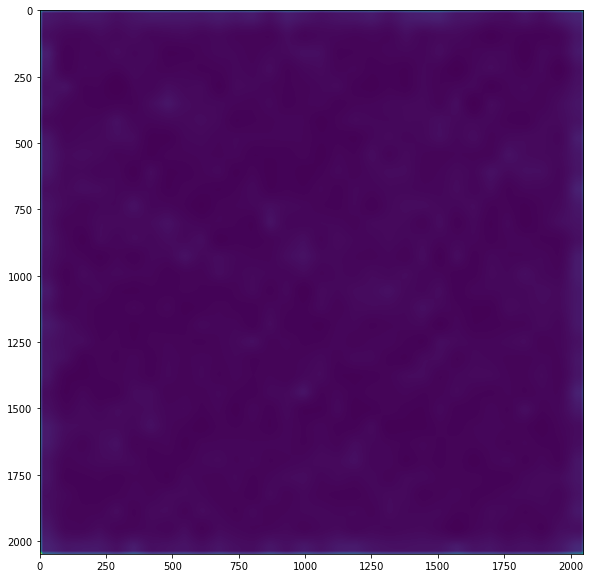

In [111]:
#model 2 here

batchsize = 4

import matplotlib.pylab as plt
import numpy
from matplotlib import colors

test2 = DataLoader(data_test, batch_size=batchsize, shuffle=True)
pixels, label = next(iter(test2))
pixels_original = pixels

#pixels = pixels[0].s         #just want one element of the batch 

pixels = pixels.permute(0,3,1,2).to(device)
labels = label.to(device)
labels = labels.unsqueeze(1).float()



after_training = model(pixels, batchsize=batchsize)               #get probabilities




after_training = after_training.squeeze(1)   
after_training = after_training.squeeze(0)   
after_training = after_training[0]                     #only want one image, batch needs to be 4 because model trained that way
 
after_training = torch.Tensor.cpu(after_training)
after_training = after_training.detach().numpy()

plt.figure(figsize=(10, 10))
plt.imshow(after_training, cmap='viridis') #, interpolation='nearest')






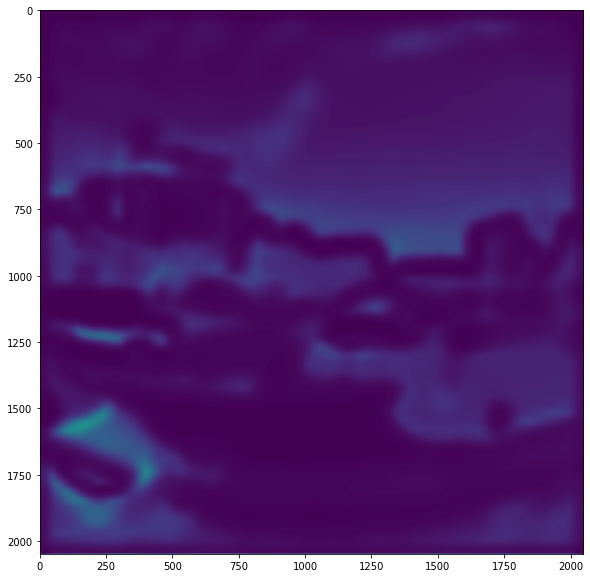

In [22]:
#do model 1 here

import matplotlib.pylab as plt
import numpy
from matplotlib import colors

test2 = DataLoader(data_test, batch_size=1, shuffle=True)
pixels, label = next(iter(test2))
pixels_original = pixels

pixels = pixels.permute(0,3,1,2).to(device)
labels = label.to(device)
labels = labels.unsqueeze(1).float()


after_training = model(pixels)

after_training = after_training.squeeze(1)   
after_training = after_training.squeeze(0)   
after_training = torch.Tensor.cpu(after_training)
after_training = after_training.detach().numpy()

plt.figure(figsize=(10, 10))
plt.imshow(after_training, cmap='viridis') #, interpolation='nearest')





torch.IntTensor
torch.Size([2048, 2048, 3])
torch.IntTensor
int32


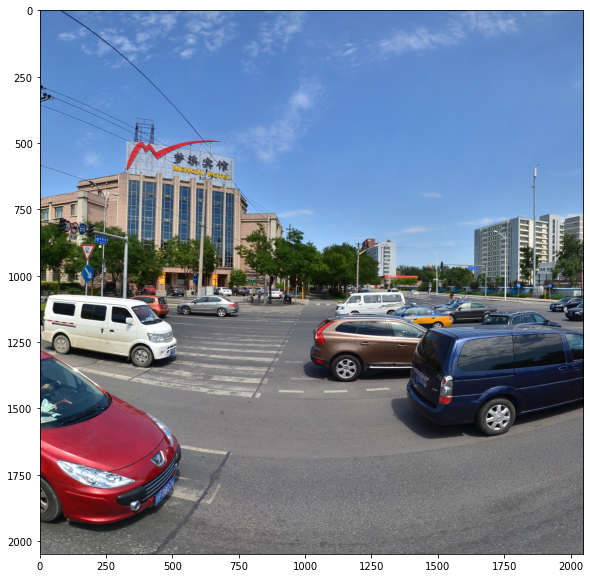

In [27]:
pixels_original = pixels_original.squeeze(0)
pixels_original = pixels_original.int()

print(pixels_original.type())
print(pixels_original.size())
matrix_original = torch.Tensor.cpu(pixels_original)
print(matrix_original.type())
matrix_original = matrix_original.detach().numpy()
print(matrix_original.dtype)

%matplotlib inline 
plt.figure(figsize=(10, 10))
plt.imshow(matrix_original) #alpha=0.6)

